Нечеткая база знаний для кондиционера  
1) Предложения, описывающие задачу, следующие:
1. Если температура высокая и температура окружающей среды высокая (TFW), то кондиционирование увеличивается.
2. Если объем помещения большой и температура окружающей среды высокая, то кондиционирование увеличивается.
3. Если температура нормальная или объем помещения средний, то кондиционирование не изменяется.
4. Если температура низкая, температура окружающей среды низкая и объем помещения маленький, то кондиционирование не изменяется или уменьшается.


То есть.
1. Если Температура =  "высокая" и TFW = "Высокая", то кондиционирование = "Увеличивается".
2. Если объем =  "большой" и TFW = "Высокая", то кондиционирование = "Увеличивается".
3. Если температура = "нормальная" или объем = "средний", то кондиционирование = "не изменяется
4. Если темпераутра = "низкая" и объем = "маленький", то кондиционирование = "не изменяется" или кондиционирование = "уменьшается"
Полученнаяа база нечетких правил полная.

In [2]:
!pip install fuzzywuzzy
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4265784b69385ea920cf8ac6e66c02ec7942d0e3c1844b8c0ce947b9c49562f7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


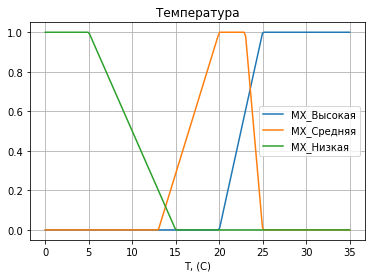

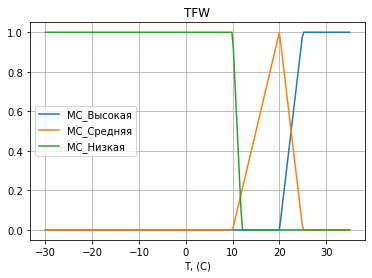

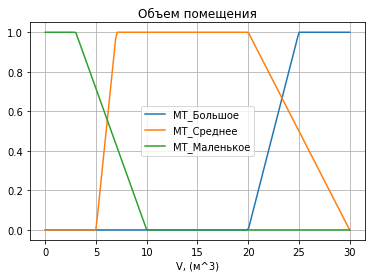

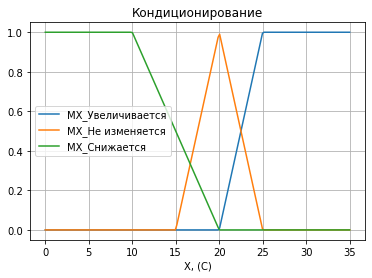

In [33]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import numpy as np

#Temperature
Temperature_High = fuzz.trapmf(np.linspace(0, 35, 200), [20, 25, 40, 40])
Temperature_Norm = fuzz.trapmf(np.linspace(0, 35, 200), [13, 20, 23, 25])
Temperature_Low = fuzz.trapmf(np.linspace(0, 35, 200), [0, 0, 5, 15])

#TFW
TFW_High = fuzz.trapmf(np.linspace(-30, 35, 200), [20, 25, 40, 40])
TFW_Norm = fuzz.trimf(np.linspace(-30, 35, 200), [10, 20, 25])
TFW_Low = fuzz.trapmf(np.linspace(-30, 35, 200), [-30, -30, 10, 12])

#size
Build_High = fuzz.trapmf(np.linspace(0, 30, 200), [20, 25, 30, 30])
Build_Norm = fuzz.trapmf(np.linspace(0, 30, 200), [5, 7, 20, 30])
Build_Low = fuzz.trapmf(np.linspace(0, 30, 200), [0, 0, 3, 10])

#heat_supply
HS_inc = fuzz.trapmf(np.linspace(0, 35, 200), [20, 25, 35, 35])
HS_const = fuzz.trimf(np.linspace(0, 35, 200), [15, 20, 25])
HS_dec = fuzz.trapmf(np.linspace(0, 35, 200), [0, 0, 10, 20])

fig, sbplt = plt.subplots()
sbplt.grid()
plt.title('Температура')
sbplt.set_xlabel('T, (С)')
sbplt.plot(np.linspace(0, 35, 200), Temperature_High, label = 'MX_Высокая')
sbplt.plot(np.linspace(0, 35, 200), Temperature_Norm, label = 'MX_Средняя')
sbplt.plot(np.linspace(0, 35, 200), Temperature_Low, label = 'MX_Низкая')
plt.legend()

fig, sbplt = plt.subplots()
sbplt.grid()
plt.title('TFW')
sbplt.set_xlabel('T, (С)')
sbplt.plot(np.linspace(-30, 35, 200), TFW_High, label = 'MС_Высокая')
sbplt.plot(np.linspace(-30, 35, 200), TFW_Norm, label = 'MС_Средняя')
sbplt.plot(np.linspace(-30, 35, 200), TFW_Low, label = 'MС_Низкая')
plt.legend()

fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('V, (м^3)')
plt.title('Объем помещения')
sbplt.plot(np.linspace(0, 30, 200), Build_High, label = 'MT_Большое')
sbplt.plot(np.linspace(0, 30, 200), Build_Norm, label = 'MT_Среднее')
sbplt.plot(np.linspace(0, 30, 200), Build_Low, label = 'MT_Маленькое')
plt.legend()

fig, sbplt = plt.subplots()
sbplt.grid()
plt.title('Кондиционирование')
sbplt.set_xlabel('X, (С)')
sbplt.plot(np.linspace(0, 35, 200), HS_inc, label = 'MX_Увеличивается')
sbplt.plot(np.linspace(0, 35, 200), HS_const, label = 'MX_Не изменяется')
sbplt.plot(np.linspace(0, 35, 200), HS_dec, label = 'MX_Снижается')
plt.legend()

Температура 30 градусов, окружающая тепература 23 градусов, объем помешения 23 м^3

In [49]:
VTH = (23-20)/5
VTN = (25-23)/2
VTL = 0

VWS = (23-20)/5
VWA = (25-23)/5
VWL = 0

VBH = (23-20)/5
VBN = (25-23)/10
VBL = 0

print(f"Температура: с уверенностью {VTH} к высокой, с уверенностью {VTN} к средней, с уверенностью {VTL} к низкой")
print(f"TFW: с уверенностью {VWS} к высокой, с уверенностью {VWA} к средней, с уверенностью {VWL} к низкой")
print(f"Объем: с уверенностью {VBH} к высокому, с уверенностью {VBN} к среднему, с уверенностью {VBL} к маленькому")

Температура: с уверенностью 0.6 к высокой, с уверенностью 1.0 к средней, с уверенностью 0 к низкой
TFW: с уверенностью 0.6 к высокой, с уверенностью 0.4 к средней, с уверенностью 0 к низкой
Объем: с уверенностью 0.6 к высокому, с уверенностью 0.2 к среднему, с уверенностью 0 к маленькому


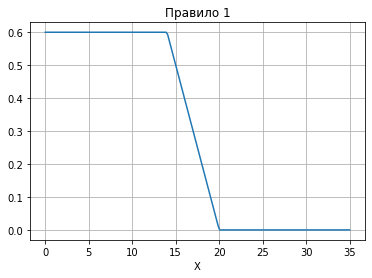

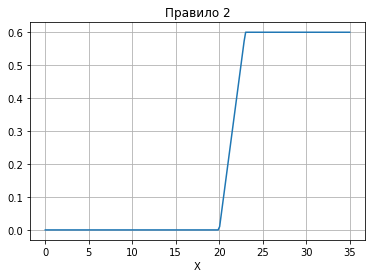

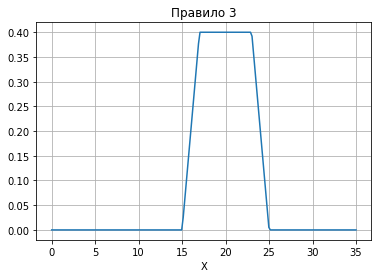

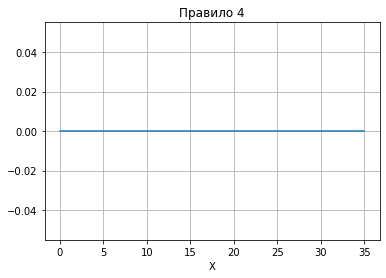

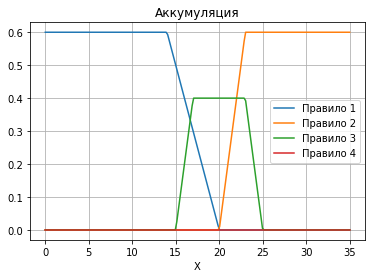

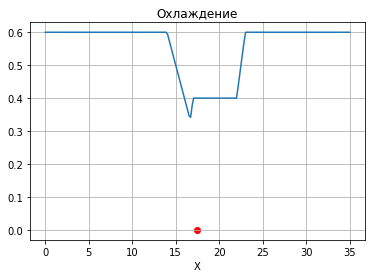

Дефаззификация: 17.406532003950062


In [50]:
lspX = np.linspace(0, 35 ,200)

Rule_1 = fuzz.fuzzy_and(lspX, HS_dec, np.linspace(0, 35 ,200), np.linspace(VTH, VTH , 200))[1]
Rule_2 = fuzz.fuzzy_and(lspX, HS_inc, np.linspace(0, 35 ,200), np.linspace(VWS, VWS , 200))[1]
Rule_3 = fuzz.fuzzy_and(lspX, HS_const, np.linspace(0, 35 ,200), np.linspace(VWA, VWA , 200))[1]
Rule_4 = fuzz.fuzzy_and(lspX, HS_inc, np.linspace(0, 35 ,200), np.linspace(0, 0 , 200))[1]


HS = fuzz.fuzzy_or(lspX, Rule_1 , lspX, Rule_2)[1]
HS = fuzz.fuzzy_or(lspX, HS , lspX, Rule_3)[1]
HS = fuzz.fuzzy_or(lspX, HS , lspX, Rule_4)[1]


fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Правило 1')
sbplt.plot(lspX, Rule_1)


fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Правило 2')
sbplt.plot(lspX, Rule_2)


fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Правило 3')
sbplt.plot(lspX, Rule_3)

fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Правило 4')
sbplt.plot(lspX, Rule_4)


fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Аккумуляция')
sbplt.plot(lspX, Rule_1, label = "Правило 1")
sbplt.plot(lspX, Rule_2, label = "Правило 2")
sbplt.plot(lspX, Rule_3, label = "Правило 3")
sbplt.plot(lspX, Rule_4, label = "Правило 4")
plt.legend()
plt.show()

fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Охлаждение')
sbplt.plot(lspX, HS)

defuzz = fuzz.defuzz(lspX, HS, 'centroid')
plt.scatter(defuzz, 0, label = 'Дефаззификация', color='red')
plt.show()

print("Дефаззификация: " + str(defuzz))

### **Задача №3**. Вывод Мамдани и Сугено.


Вывод Мамдани


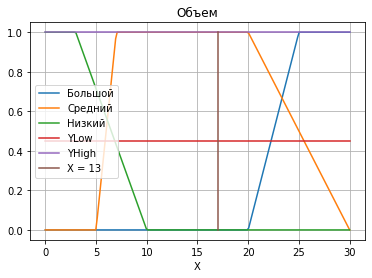

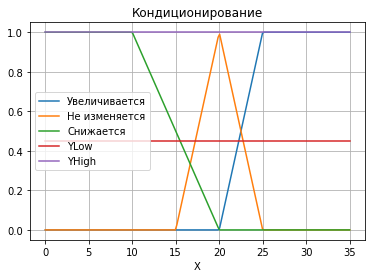

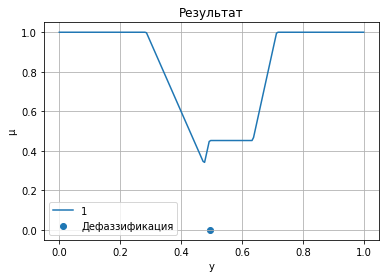

Дефаззификация y = 0.4965824800952044


In [56]:
XEntrance = 17
x = np.linspace(0, 1, 200)
YLow = Build_Norm[(int)(XEntrance * 10 - 1)]
YHigh = Build_High[(int)(XEntrance * 10 - 1)]

fg, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Объем')
sbplt.plot(np.linspace(0, 30, 200), Build_High, label = 'Большой')
sbplt.plot(np.linspace(0, 30, 200), Build_Norm, label = 'Средний')
sbplt.plot(np.linspace(0, 30, 200), Build_Low, label = 'Низкий')
sbplt.plot(np.linspace(0, 30, 200), np.linspace(YLow, YLow, 200), label = 'YLow')
sbplt.plot(np.linspace(0, 30, 200), np.linspace(YHigh, YHigh, 200), label = 'YHigh')
sbplt.plot(np.linspace(XEntrance, XEntrance, 200), np.linspace(0, 1, 200), label = 'X = 13')
plt.legend()

fig, sbplt = plt.subplots()
sbplt.grid()
plt.title('Кондиционирование')
sbplt.set_xlabel('X')
sbplt.plot(np.linspace(0, 35, 200), HS_inc, label = 'Увеличивается')
sbplt.plot(np.linspace(0, 35, 200), HS_const, label = 'Не изменяется')
sbplt.plot(np.linspace(0, 35, 200), HS_dec, label = 'Снижается')
sbplt.plot(np.linspace(0, 35, 200), np.linspace(YLow, YLow, 200), label = 'YLow')
sbplt.plot(np.linspace(0, 35, 200), np.linspace(YHigh, YHigh, 200), label = 'YHigh')
plt.legend()

p = np.linspace(0, 50, 200)


ShearFirst = fuzz.fuzzy_or(p, fuzz.fuzzy_and(p, HS_const, p, np.linspace(YLow, YLow,200))[1] , p, fuzz.fuzzy_and(p, HS_inc, p, np.linspace(YHigh, YHigh,200))[1])[1]

ShearFirst = fuzz.fuzzy_or(np.linspace(0, 50, 200), ShearFirst, np.linspace(0, 50, 200), HS_dec )[1]
defuzz = fuzz.defuzz(x, ShearFirst, 'centroid')
fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')
sbplt.plot(x, ShearFirst , label= '1')
print ("Вывод Мамдани")
plt.scatter(defuzz, 0, label = 'Дефаззификация')
plt.legend()
plt.title('Результат')
plt.show()

print("Дефаззификация y = " + (str)(defuzz))

Вывод Сугено


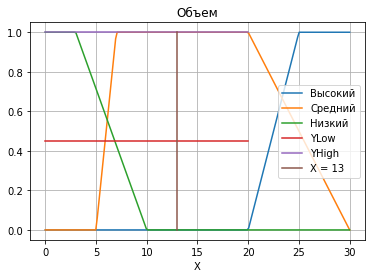

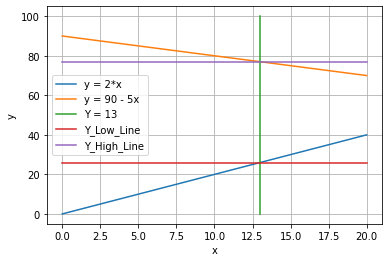

Дефаззификация: y = 61.11995965989115


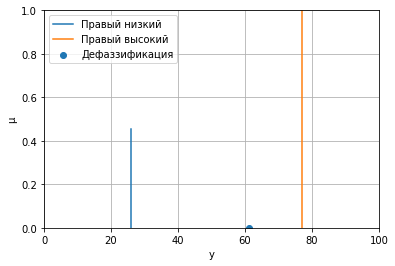

In [55]:
print("Вывод Сугено")
XEntrance = 13

fg, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
plt.title('Объем')
sbplt.plot(np.linspace(0, 30, 200), Build_High, label = 'Высокий')
sbplt.plot(np.linspace(0, 30, 200), Build_Norm, label = 'Средний')
sbplt.plot(np.linspace(0, 30, 200), Build_Low, label = 'Низкий')
sbplt.plot(np.linspace(0, 20, 200), np.linspace(YLow, YLow, 200), label = 'YLow')
sbplt.plot(np.linspace(0, 20, 200), np.linspace(YHigh, YHigh, 200), label = 'YHigh')
sbplt.plot(np.linspace(XEntrance, XEntrance, 200), np.linspace(0, 1, 200), label = 'X = 13')
plt.legend()


Low_Line = np.array(list(map(lambda t: 2* t, x)))
High_Line = np.array(list(map(lambda t: 90-t, x)))

Y_Low_Line = Low_Line[(int)(XEntrance*10) - 1]
Y_High_Line = High_Line[(int)(XEntrance*10) - 1]
x = np.linspace(0, 20, 200)
fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('x')
sbplt.set_ylabel('y')
sbplt.plot(x, Low_Line , label= 'y = 2*x')
sbplt.plot(x, High_Line , label= 'y = 90 - 5x')
sbplt.plot(np.linspace(XEntrance, XEntrance, 200), np.linspace(0, 100, 200), label = 'Y = 13')
sbplt.plot(np.linspace(0, 20, 200), np.linspace(Y_Low_Line, Y_Low_Line, 200), label = 'Y_Low_Line')
sbplt.plot(np.linspace(0, 20, 200), np.linspace(Y_High_Line, Y_High_Line, 200), label = 'Y_High_Line')
plt.legend()
plt.show()



fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')

sbplt.plot(np.linspace(Y_Low_Line, Y_Low_Line, 200), np.linspace(0, YLow, 200), label = 'Правый низкий')
sbplt.plot(np.linspace(Y_High_Line, Y_High_Line, 200), np.linspace(0, YHigh, 200), label = 'Правый высокий')

defuzz = (Y_Low_Line * YLow + Y_High_Line * YHigh) / (YLow + YHigh)
print ('Дефаззификация: y = ' + (str)(defuzz))
plt.scatter(defuzz, 0, label = 'Дефаззификация')
plt.ylim(0, 1)
plt.xlim(0, 100)
plt.legend()
plt.show()